In [214]:
import random
import pandas as pd
from matplotlib import pyplot as plt


In [288]:
added = [random.randrange(1,100) for i in range(100)]


(array([1., 1., 1., 1., 1., 2., 0., 1., 2., 0., 1., 3., 1., 1., 0., 0., 0.,
        2., 0., 0., 2., 2., 1., 0., 1., 1., 3., 2., 0., 0., 0., 0., 0., 0.,
        1., 0., 2., 2., 2., 2., 2., 1., 0., 1., 1., 0., 1., 4., 1., 1., 2.,
        2., 0., 1., 1., 3., 2., 1., 0., 2., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 4., 2., 0., 1., 2., 0., 1., 0., 2., 0., 1., 1., 1., 0., 1., 2.,
        0., 0., 1., 1., 2., 1., 2., 0., 0., 1., 2., 1., 1., 1., 1.]),
 array([ 1.  ,  1.97,  2.94,  3.91,  4.88,  5.85,  6.82,  7.79,  8.76,
         9.73, 10.7 , 11.67, 12.64, 13.61, 14.58, 15.55, 16.52, 17.49,
        18.46, 19.43, 20.4 , 21.37, 22.34, 23.31, 24.28, 25.25, 26.22,
        27.19, 28.16, 29.13, 30.1 , 31.07, 32.04, 33.01, 33.98, 34.95,
        35.92, 36.89, 37.86, 38.83, 39.8 , 40.77, 41.74, 42.71, 43.68,
        44.65, 45.62, 46.59, 47.56, 48.53, 49.5 , 50.47, 51.44, 52.41,
        53.38, 54.35, 55.32, 56.29, 57.26, 58.23, 59.2 , 60.17, 61.14,
        62.11, 63.08, 64.05, 65.02, 65.99, 66.96, 67.

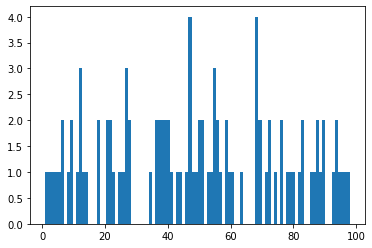

In [287]:
plt.hist(added,bins=100)

#histogram of the values

In [267]:
df  = pd.DataFrame(added)

<AxesSubplot:ylabel='Density'>

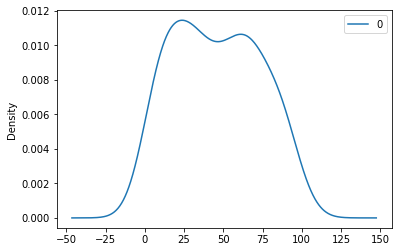

In [283]:
df.plot.kde()

In [268]:
population_variance = df.var(ddof=0)
print(population_variance)

0    736.1179
dtype: float64


In [269]:
### let's get a sample of 100 values.
df_sample_size_100 = df.sample(100).reset_index(drop=True)
df_sample_size_100
df_sample_size_100.var()

0    743.553434
dtype: float64

In [270]:
###Let's get the variance of 100 samples of 100

variance_of_samples=[]
mean_rolling_variance = []

for i in range(1,101):
    
    sample_of_100 = df.sample(10).reset_index(drop=True)
    sample_of_100_variance = int(sample_of_100.var(ddof=0))
    
    variance_of_samples.append(int(sample_of_100_variance))
                                      
    if(i == 1):
        mean_rolling_variance.append(sample_of_100_variance)
    else:
        mean_rolling_variance.append(int(sum(variance_of_samples)/(i)))

In [271]:
#Let's use these 3 lists to make a new dataframe
df_100_samples = pd.DataFrame(list(zip(variance_of_samples,mean_rolling_variance)),columns=["Sample Variance","Rolling Variance"])

In [272]:
df_100_samples

,Sample Variance,Rolling Variance
0,1224,1224
1,505,864
2,798,842
3,560,771
4,202,657
...,...,...
95,675,654
96,512,652
97,598,652
98,707,652


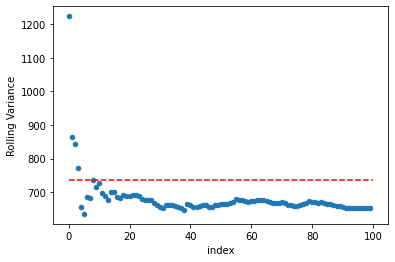

In [273]:
fig,ax = plt.subplots()
df_100_samples.reset_index().plot.scatter(x="index",y="Rolling Variance",ax=ax)
ax.plot([0,100],[population_variance,population_variance],linestyle="--",color="red")

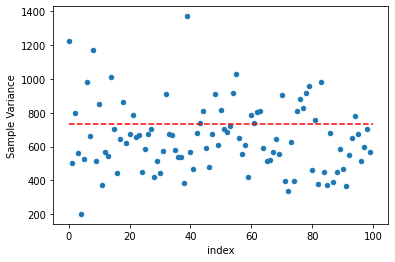

In [274]:
fig1,ax1 = plt.subplots()
df_100_samples.reset_index().plot.scatter(x="index",y="Sample Variance",ax=ax1)
ax1.plot([0,100],[population_variance,population_variance],linestyle="--",color="red")

In [275]:
###Let's get the variance of 1000 samples of 100 corrected 

variance_of_samples_corrected=[]
mean_rolling_variance_corrected = []

for i in range(1,1001):
    
    sample_of_100_corrected = df.sample(10).reset_index(drop=True)
    sample_of_100_variance_corrected= int(sample_of_100_corrected.var(ddof=1))
    
    variance_of_samples_corrected.append(int(sample_of_100_variance_corrected))
                                      
    if(i == 1):
        mean_rolling_variance_corrected.append(sample_of_100_variance_corrected)
    else:
        mean_rolling_variance_corrected.append(int(sum(variance_of_samples_corrected)/(i)))

In [276]:
df_100_samples_corrected = pd.DataFrame(list(zip(variance_of_samples_corrected,mean_rolling_variance_corrected)),columns=["Sample Variance","Rolling Variance"])

In [277]:
df_100_samples_corrected

,Sample Variance,Rolling Variance
0,846,846
1,316,581
2,408,523
3,795,591
4,784,629
...,...,...
995,872,737
996,857,738
997,898,738
998,943,738


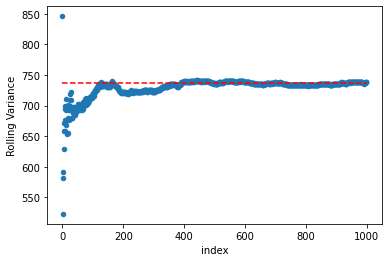

In [278]:
fig3,ax3 = plt.subplots()
df_100_samples_corrected.reset_index().plot.scatter(x="index",y="Rolling Variance",ax=ax3)
ax3.plot([0,1000],[population_variance,population_variance],linestyle="--",color="red")

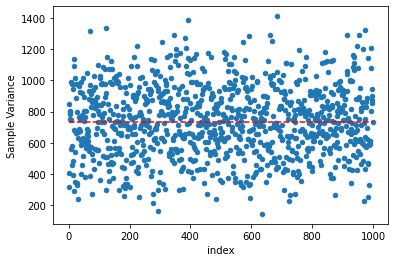

In [279]:
fig4,ax4 = plt.subplots()
df_100_samples_corrected.reset_index().plot.scatter(x="index",y="Sample Variance",ax=ax4)
ax4.plot([0,1000],[population_variance,population_variance],linestyle="--",color="red")

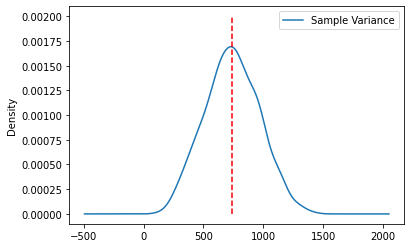

In [280]:
fig5,ax5 = plt.subplots()
df_100_samples_corrected.drop(["Rolling Variance"],axis=1).plot.kde(ax=ax5)
ax5.plot([population_variance,population_variance],[0,.002],linestyle="--",color="red")

In [281]:
#Even though the underlying dataset is not normally distributed, we can see that the sample variance is

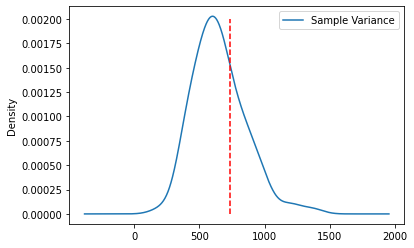

In [282]:
fig6,ax6 = plt.subplots()
df_100_samples.drop(["Rolling Variance"],axis=1).plot.kde(ax=ax6)
ax6.plot([population_variance,population_variance],[0,.002],linestyle="--",color="red")